# Layout tutorial (short)

A `Component` is like an empty canvas, where you can add polygons, references to other Components and ports (to connect to other components)

![](https://i.imgur.com/oeuKGsc.png)

In gdsfactory **all dimensions** are in **microns**

In [5]:
try:
  import google.colab
  is_running_on_colab = True
  !pip install gdsfactory[cad] > /dev/null
  
except ImportError:
  is_running_on_colab = False

## Polygons

You can add polygons to different layers.

2023-11-25 15:51:49.494 | INFO     | gdsfactory.technology.layer_views:__init__:810 - Importing LayerViews from YAML file: 'C:\\Users\\s3923133\\AppData\\Local\\miniconda3\\Lib\\site-packages\\gdsfactory\\generic_tech\\layer_views.yaml'.
2023-11-25 15:51:49.534 | INFO     | gdsfactory.pdk:activate:341 - 'generic' PDK is now active


You can install `pip install gdsfactory` for better visualization


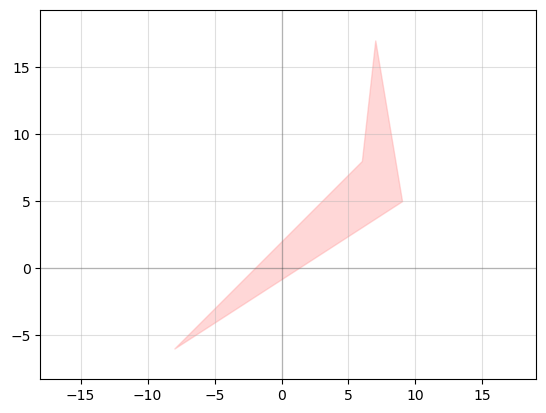

In [6]:
import gdsfactory as gf
from gdsfactory.generic_tech import get_generic_pdk

gf.config.rich_output()
gf.CONF.display_type = 'klayout'

PDK = get_generic_pdk()
PDK.activate()


@gf.cell
def demo_polygons():
    # Create a blank component (essentially an empty GDS cell with some special features)
    c = gf.Component()

    # Create and add a polygon from separate lists of x points and y points
    # (Can also be added like [(x1,y1), (x2,y2), (x3,y3), ... ]
    poly1 = c.add_polygon(
        [(-8, 6, 7, 9), (-6, 8, 17, 5)], layer=(1, 0)
    )  # GDS layers are tuples of ints (but if we use only one number it assumes the other number is 0)
    return c


c = demo_polygons()
c.plot()  # show it in KLayout

**Exercise** :

Make a component similar to the one above that has a second polygon in layer (2, 0)

myComponent2: uid 9484f8a3, ports [], references ['text_1', 'text_2', 'rectangle_1'], 0 polygons
You can install `pip install gdsfactory` for better visualization


C:\Users\s3923133\AppData\Local\miniconda3\Lib\site-packages\gdsfactory\component.py:180: UserWarning: Component name myComponent2 already used. Use @cell decorator for auto-naming.
  warnings.warn(


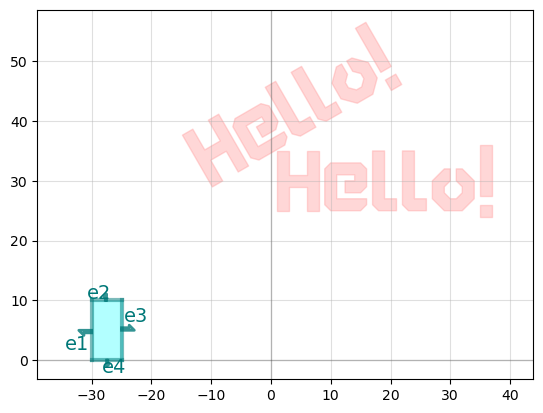

In [12]:
c = gf.Component("myComponent2")
# Create some new geometry from the functions available in the geometry library
t = gf.components.text("Hello!")
r = gf.components.rectangle(size=[5, 10], layer=(2, 0))

# Add references to the new geometry to c, our blank component
text1 = c.add_ref(t)  # Add the text we created as a reference
# Using the << operator (identical to add_ref()), add the same geometry a second time
text2 = c << t
r = c << r  # Add the rectangle we created

# Now that the geometry has been added to "c", we can move everything around:
text1.movey(25)
text2.move([5, 30])
text2.rotate(30)
r.movex(-15)
r.movex(-15)

print(c)
c.plot()

You can install `pip install gdsfactory` for better visualization


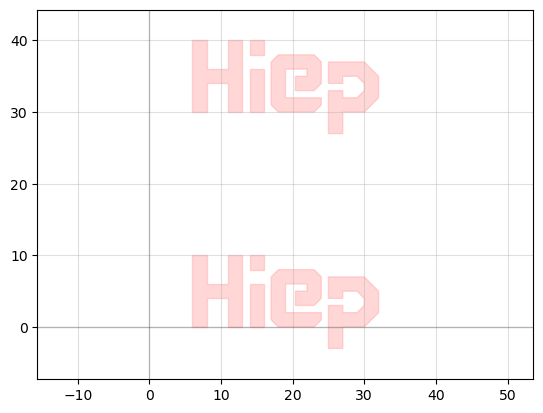

In [19]:
c = gf.Component("My Component")
label = gf.components.text("Hiep")
my_text = c.add_ref(label)
my_text_2 = c.add_ref(label)
my_text.move([5, 30])
my_text_2.movex(5)
c.plot()

You define polygons both from `gdstk` or `Shapely`

You can install `pip install gdsfactory` for better visualization


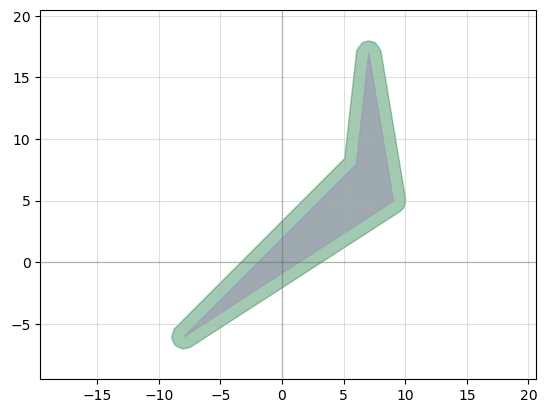

In [4]:
from shapely.geometry.polygon import Polygon

import gdsfactory as gf

c = gf.Component("Mixed_polygons")
p0 = Polygon(zip((-8, 6, 7, 9), (-6, 8, 17, 5)))
p1 = p0.buffer(1)
p2 = p1.simplify(tolerance=0.1)
c.add_polygon(p0, layer=(1,0))
c.add_polygon(p1, layer=(2,0))
c.add_polygon(p2, layer=(3,0))

c.add_polygon([(-8, 6, 7, 9), (-6, 8, 17, 5)], layer=(4, 0))
c.plot()

In [ ]:
p0

In [ ]:
p1 = p0.buffer(1)
p1

In [ ]:
pnot = p1 - p0
pnot

In [ ]:
c = gf.Component("exterior")
c.add_polygon(pnot, layer=(3, 0))
c.plot()

In [ ]:
p_small = p0.buffer(-1)
p_small

In [ ]:
p_or = pnot | p_small
p_or

In [ ]:
c = gf.Component("p_or")
c.add_polygon(p_or, layer=(1,0))
c.plot()

In [ ]:
import shapely as sp

p5 = sp.envelope(p0)
p5

In [ ]:
p6 = p5 - p0
p6

In [ ]:
c = gf.Component("p6")
c.add_polygon(p6, layer=(1,0))
c.plot()

In [ ]:
c = gf.Component("demo_multilayer")
p0 = c.add_polygon(p0, layer={(2,0), (3,0)})
c.plot()

In [ ]:
c = gf.Component("demo_mirror")
p0 = c.add_polygon(p0, layer=(1, 0))
p9 = c.add_polygon(p0, layer=(2, 0))
p9.mirror()
c.plot()

In [ ]:
c = gf.Component("demo_xmin")
p0 = c.add_polygon(p0, layer=(1, 0))
p9 = c.add_polygon(p0, layer=(2, 0))
p9.mirror()
p9.xmin = p0.xmax
c.plot()

In [ ]:
c = gf.Component("enclosure1")
r = c << gf.components.ring_single()
c.plot()

In [ ]:
c = gf.Component("enclosure2")
r = c << gf.components.ring_single()
p = c.get_polygon_bbox()
c.add_polygon(p, layer=(2, 0))
c.plot()

In [ ]:
c = gf.Component("enclosure3")
r = c << gf.components.ring_single()
p = c.get_polygon_bbox(top=3, bottom=3)
c.add_polygon(p, layer=(2, 0))
c.plot()

In [ ]:
c = gf.Component("enclosure3")
r = c << gf.components.ring_single()
p = c.get_polygon_enclosure()
c.add_polygon(p, layer=(2, 0))
c.plot()

In [ ]:
c = gf.Component("enclosure3")
r = c << gf.components.ring_single()
p = c.get_polygon_enclosure()
p2 = p.buffer(3)
c.add_polygon(p2, layer=(2, 0))
c.plot()

## Connect **ports**

Components can have a "Port" that allows you to connect ComponentReferences together like legos.

You can write a simple function to make a rectangular straight, assign ports to the ends, and then connect those rectangles together.

Notice that `connect` transform each reference but things won't remain connected if you move any of the references afterwards.


In [ ]:
@gf.cell
def straight(length=10, width=1, layer=(1, 0)):
    c = gf.Component()
    c.add_polygon([(0, 0), (length, 0), (length, width), (0, width)], layer=layer)
    c.add_port(
        name="o1", center=[0, width / 2], width=width, orientation=180, layer=layer
    )
    c.add_port(
        name="o2", center=[length, width / 2], width=width, orientation=0, layer=layer
    )
    return c


c = gf.Component("straights_not_connected")

wg1 = c << straight(length=6, width=2.5, layer=(1, 0))
wg2 = c << straight(length=6, width=2.5, layer=(2, 0))
wg3 = c << straight(length=15, width=2.5, layer=(3, 0))
wg2.movey(10).rotate(10)
wg3.movey(20).rotate(15)

c.plot()

Now we can connect everything together using the ports:

Each straight has two ports: 'o1' and 'o2', respectively on the East and West sides of the rectangular straight component. These are arbitrary
names defined in our straight() function above

In [ ]:
# Let's keep wg1 in place on the bottom, and connect the other straights to it.
# To do that, on wg2 we'll grab the "o1" port and connect it to the "o2" on wg1:
wg2.connect("o1", wg1.ports["o2"])
# Next, on wg3 let's grab the "o1" port and connect it to the "o2" on wg2:
wg3.connect("o1", wg2.ports["o2"])

c.plot()

Ports can be added by copying existing ports. In the example below, ports are added at the component-level on c from the existing ports of children wg1 and wg3
(i.e. eastmost and westmost ports)

In [ ]:
c.add_port("o1", port=wg1.ports["o1"])
c.add_port("o2", port=wg3.ports["o2"])
c.plot()

## Move and rotate references

You can move, rotate, and reflect references to Components.

In [ ]:
c = gf.Component("straights_connected")

wg1 = c << straight(length=1, layer=(1, 0))
wg2 = c << straight(length=2, layer=(2, 0))
wg3 = c << straight(length=3, layer=(3, 0))

# Create and add a polygon from separate lists of x points and y points
# e.g. [(x1, x2, x3, ...), (y1, y2, y3, ...)]
poly1 = c.add_polygon([(8, 6, 7, 9), (6, 8, 9, 5)], layer=(4, 0))

# Alternatively, create and add a polygon from a list of points
# e.g. [(x1,y1), (x2,y2), (x3,y3), ...] using the same function
poly2 = c.add_polygon([(0, 0), (1, 1), (1, 3), (-3, 3)], layer=(5, 0))

# Shift the first straight we created over by dx = 10, dy = 5
wg1.move([10, 5])

# Shift the second straight over by dx = 10, dy = 0
wg2.move(origin=[0, 0], destination=[10, 0])

# Shift the third straight over by dx = 0, dy = 4. The translation movement consist of the difference between the values of the destination and the origin and can optionally be limited in a single axis.
wg3.move([1, 1], [5, 5], axis="y")

# Then, move again the third straight "from" x=0 "to" x=10 (dx=10)
wg3.movex(0, 10)

c.plot()

## Ports

Your straights wg1/wg2/wg3 are references to other waveguide components.

If you want to add ports to the new Component `c` you can use `add_port`, where you can create a new port or use a reference to an existing port from the underlying reference.

You can access the ports of a Component or ComponentReference

In [ ]:
wg2.ports

## References

Now that your component `c` is a multi-straight component, you can add references to that component in a new blank Component `c2`, then add two references and shift one to see the movement.

In [ ]:
c2 = gf.Component("MultiWaveguides")
wg1 = straight()
wg2 = straight(layer=(2, 0))
mwg1_ref = c2.add_ref(wg1)
mwg2_ref = c2.add_ref(wg2)
mwg2_ref.move(destination=[10, 10])
c2.plot()

In [ ]:
# Like before, let's connect mwg1 and mwg2 together
mwg1_ref.connect(port="o2", destination=mwg2_ref.ports["o1"])
c2.plot()

## Labels

You can add abstract GDS labels to annotate your Components, in order to record information
directly into the final GDS file without putting any extra geometry onto any layer
This label will display in a GDS viewer, but will not be rendered or printed
like the polygons created by `gf.components.text()`.

In [ ]:
c2.add_label(text="First label", position=mwg1_ref.center)
c2.add_label(text="Second label", position=mwg2_ref.center)

# labels are useful for recording information
c2.add_label(
    text=f"The x size of this\nlayout is {c2.xsize}",
    position=(c2.xmax, c2.ymax),
    layer=(10, 0),
)
c2.plot()

Another simple example

In [ ]:
c = gf.Component("rectangle_with_label")
r = c << gf.components.rectangle(size=(1, 1))
r.x = 0
r.y = 0
c.add_label(
    text="Demo label",
    position=(0, 0),
    layer=(1, 0),
)
c.plot()

## Boolean shapes

If you want to subtract one shape from another, merge two shapes, or
perform an XOR on them, you can do that with the `boolean()` function.


The ``operation`` argument should be {not, and, or, xor, 'A-B', 'B-A', 'A+B'}.
Note that 'A+B' is equivalent to 'or', 'A-B' is equivalent to 'not', and
'B-A' is equivalent to 'not' with the operands switched

In [ ]:
c = gf.Component("boolean_demo")
e1 = c.add_ref(gf.components.ellipse(layer=(2, 0)))
e2 = c.add_ref(gf.components.ellipse(radii=(10, 6), layer=(2, 0))).movex(2)
e3 = c.add_ref(gf.components.ellipse(radii=(10, 4), layer=(2, 0))).movex(5)
c.plot()

In [ ]:
c2 = gf.geometry.boolean(A=[e1, e3], B=e2, operation="A-B", layer=(2, 0))
c2.plot()

## Move Reference by port

In [ ]:
c = gf.Component("ref_port_sample")
mmi = c.add_ref(gf.components.mmi1x2())
bend = c.add_ref(gf.components.bend_circular(layer=(2, 0)))
c.plot()

In [ ]:
bend.connect("o1", mmi.ports["o2"])  # connects follow Source, destination syntax
c.plot()

## Mirror reference

By default the mirror works along the y-axis.

In [ ]:
c = gf.Component("ref_mirror")
mmi = c.add_ref(gf.components.mmi1x2())
bend = c.add_ref(gf.components.bend_circular(layer=(2, 0)))
c.plot()

In [ ]:
mmi.mirror()
c.plot()

In [ ]:
mmi.mirror_y()
c.plot()

In [ ]:
mmi.mirror_x()
c.plot()

## Write

You can write your Component to:

- GDS file (Graphical Database System) or OASIS for chips.
- gerber for PCB.
- STL for 3d printing.

In [ ]:
import gdsfactory as gf

c = gf.components.cross()
c.write_gds("demo.gds")
c.plot()

You can see the GDS file in Klayout viewer.

Sometimes you also want to save the GDS together with metadata (settings, port names, widths, locations ...) in YAML

In [ ]:
c.write_gds("demo.gds", with_metadata=True)

In [ ]:
c.write_oas("demo.oas")

In [ ]:
c.write_stl("demo.stl")

In [ ]:
scene = c.to_3d()
scene.show()